# House Price Prediction Regression Project

## Project Goal

Implement a linear regression model to predict the prices of houses on their square footage and the number of bedrooms and bathrooms.

## Load Modules/ Libraries

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

## Load dataset

In [2]:
train_data_path = r"F:\house_price_prediction\data\train.csv"
test_data_path = r"F:\house_price_prediction\data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print("shape of df_train: ", df_train.shape)
print("shape of df_test: ", df_test.shape)

shape of df_train:  (1460, 81)
shape of df_test:  (1459, 80)


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

## Data Integration

In [6]:
df = pd.concat([df_train, df_test])

print("Shape of Integrated Data/ Df:", df.shape)

Shape of Integrated Data/ Df: (2919, 81)


In [7]:
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
df.tail(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

   

## Get the brief Information of Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# Most Null value Feature
Alley
FireplaceQu
PoolQC
Fence
MiscFeature

In [10]:
int_features = df.select_dtypes(include=["int64"]).columns
print("Total number of Integer features: ", int_features.shape[0])

print ("Integer features names:", int_features.tolist())

Total number of Integer features:  26
Integer features names: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
float_features = df.select_dtypes(include=["float64"]).columns
print("Total number of flaoting features: ", float_features.shape[0])

print ("Floating features names:", float_features.tolist())

Total number of flaoting features:  12
Floating features names: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [12]:
categorical_features = df.select_dtypes(include=["object"]).columns
print("Total number of categorical features: ", categorical_features.shape[0])

print ("categorical features names:", categorical_features.tolist())

Total number of categorical features:  43
categorical features names: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the statistical Information of Numerical Features

In [13]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [14]:
df.describe().shape

(8, 38)

## Handling Missing Values

## visualize null/ Missing Values

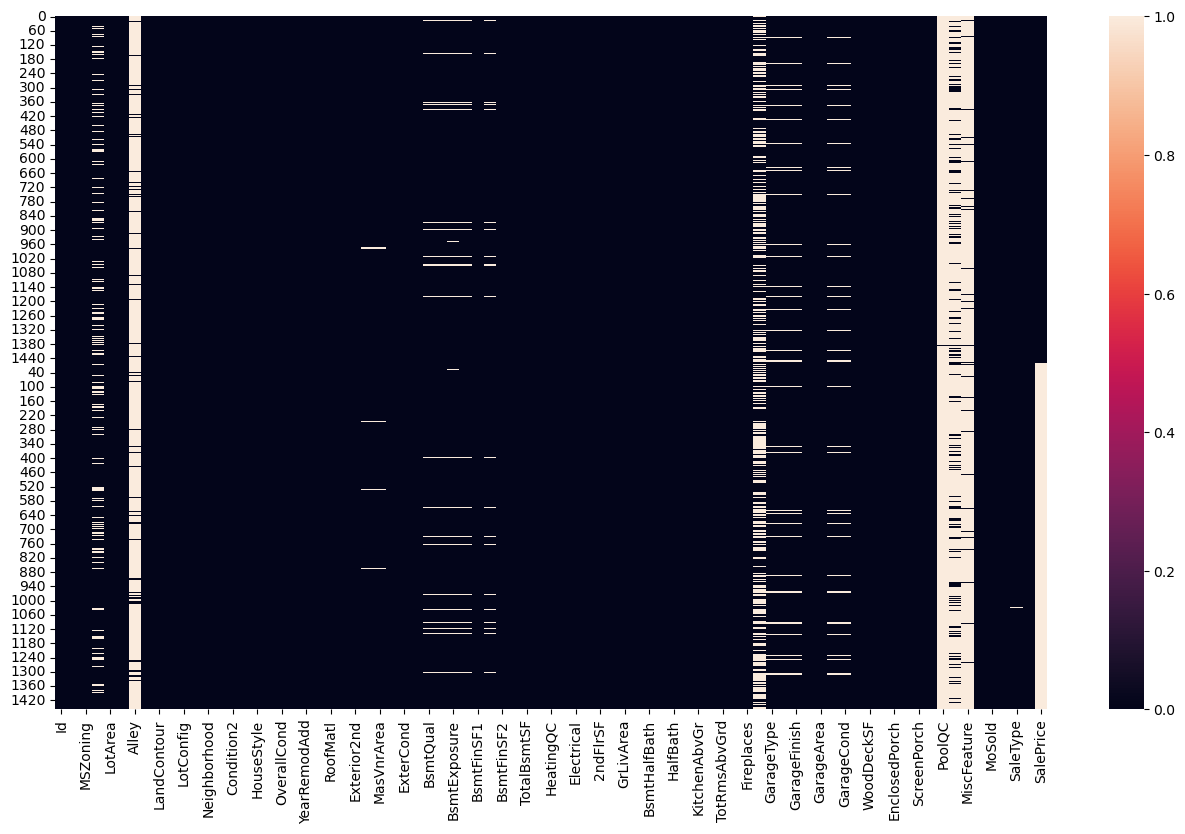

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

## Get the null value percentage for every feature

In [16]:
df = df.set_index("Id")

In [20]:
null_count = df.isnull().sum()
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [21]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

## Drop Columns/Features

As per observation, we will not drop any features from dataset

In [22]:
miss_value_50_perc = null_percent [null_percent > 50]
miss_value_50_perc

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [23]:
miss_value_20_50_perc = null_percent [(null_percent > 20) & (null_percent < 51)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [24]:
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 21)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [25]:
df["LotFrontage"].value_counts().head()

60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64

<Axes: ylabel='Id'>

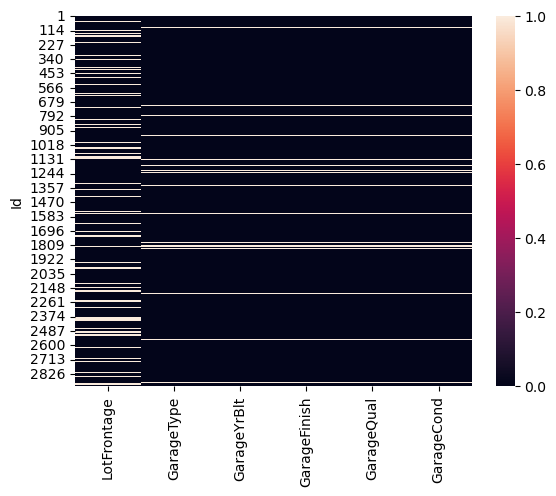

In [26]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

# Missing value imputation

In [27]:
missing_value_feat = null_percent[null_percent > 0]
print("Total missing value features = ", len(missing_value_feat))

Total missing value features =  35


In [28]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [29]:
categorical_na_feat = missing_value_feat[missing_value_feat.keys().isin(categorical_features)]
print("Total number of categorical missing features = ", len(categorical_na_feat))
categorical_na_feat

Total number of categorical missing features =  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [30]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("Total number of integer missing features = ", len(int_na_feat))
int_na_feat

Total number of integer missing features =  0


Series([], dtype: float64)

In [31]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("Total number of floating missing features = ", len(float_na_feat))
float_na_feat

Total number of floating missing features =  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

## Handling MSZoning = 0.137033

In [32]:
df["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [33]:
### Backup of original data
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [34]:
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan, mszoning_mode, inplace = True)
df_mvi["MSZoning"].isnull().sum()

0

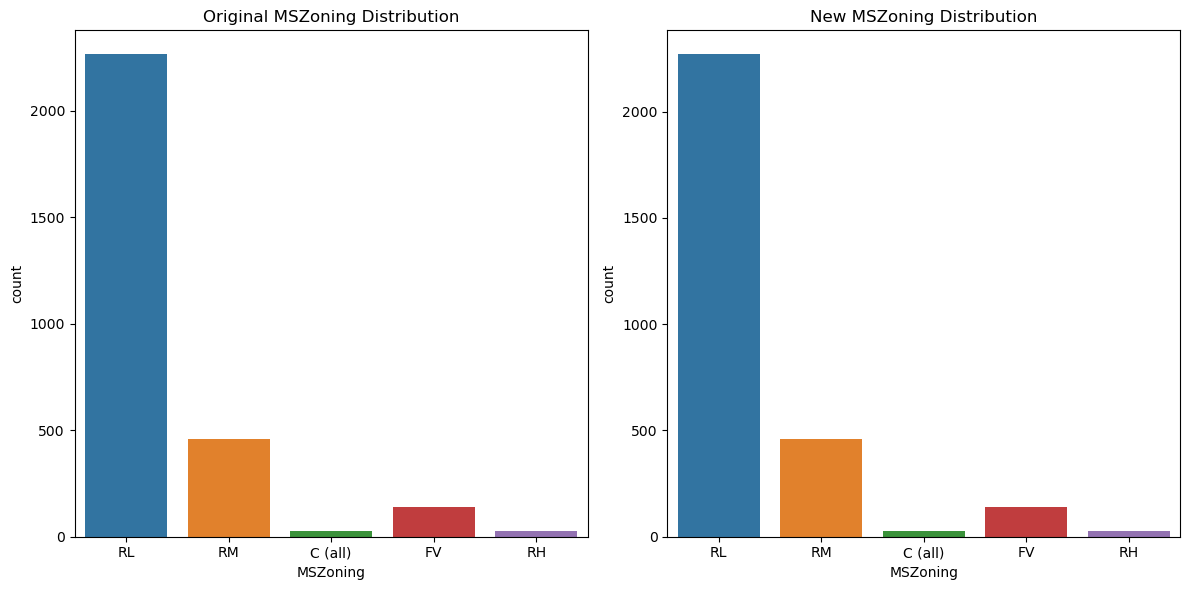

In [35]:
def oldNewCountPlot(df, df_new, feature):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    sns.countplot(x=df[feature]) 
    plt.title(f'Original {feature} Distribution')

    plt.subplot(122)
    sns.countplot(x=df_new[feature]) 
    plt.title(f'New {feature} Distribution')
    
    plt.tight_layout() 
    plt.show()


oldNewCountPlot(df, df_mvi, "MSZoning")

## Handling LotFontage = 1.649538


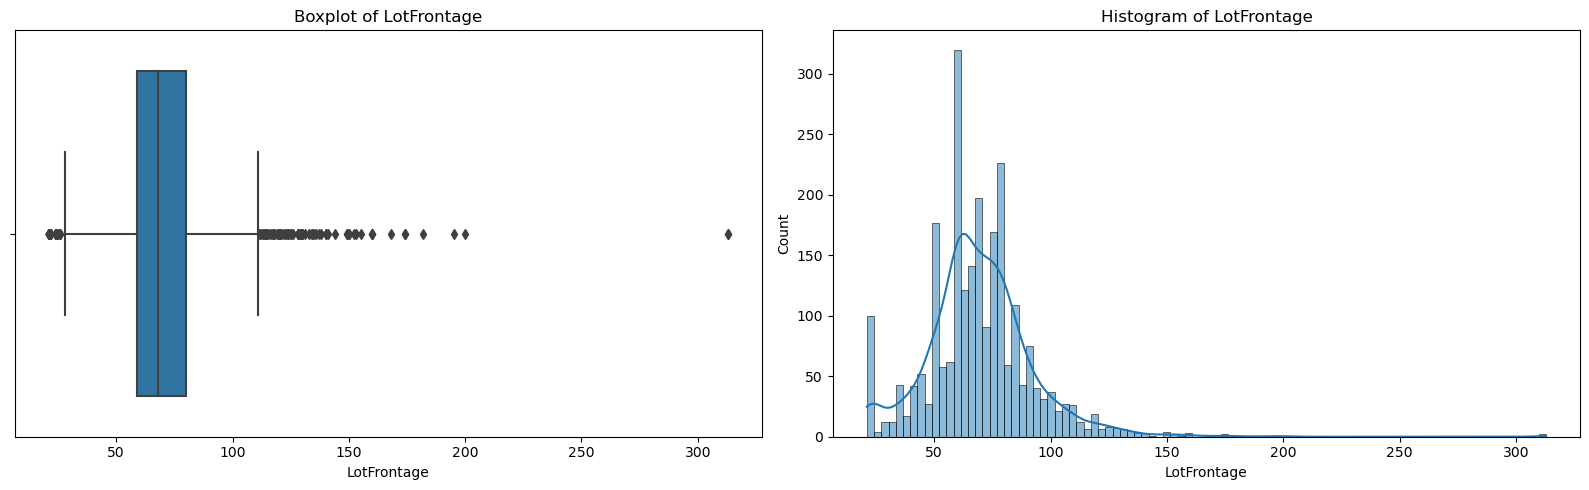

In [36]:
def boxMistPlot(df_column, figsize=(16, 5)):
    plt.figure(figsize=figsize)
    
    # Box plot
    plt.subplot(121)
    sns.boxplot(x=df_column)
    plt.title('Boxplot of ' + df_column.name)
    
    # Histogram
    plt.subplot(122)
    sns.histplot(df_column, kde=True)  
    plt.title('Histogram of ' + df_column.name)
    
    plt.tight_layout()
    plt.show()


boxMistPlot(df['LotFrontage'])

In [37]:
print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [38]:
print(df.head())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm  

In [39]:
lotfrontage_mean = df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace = True)
df_mvi["LotFrontage"].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Id
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      Fal

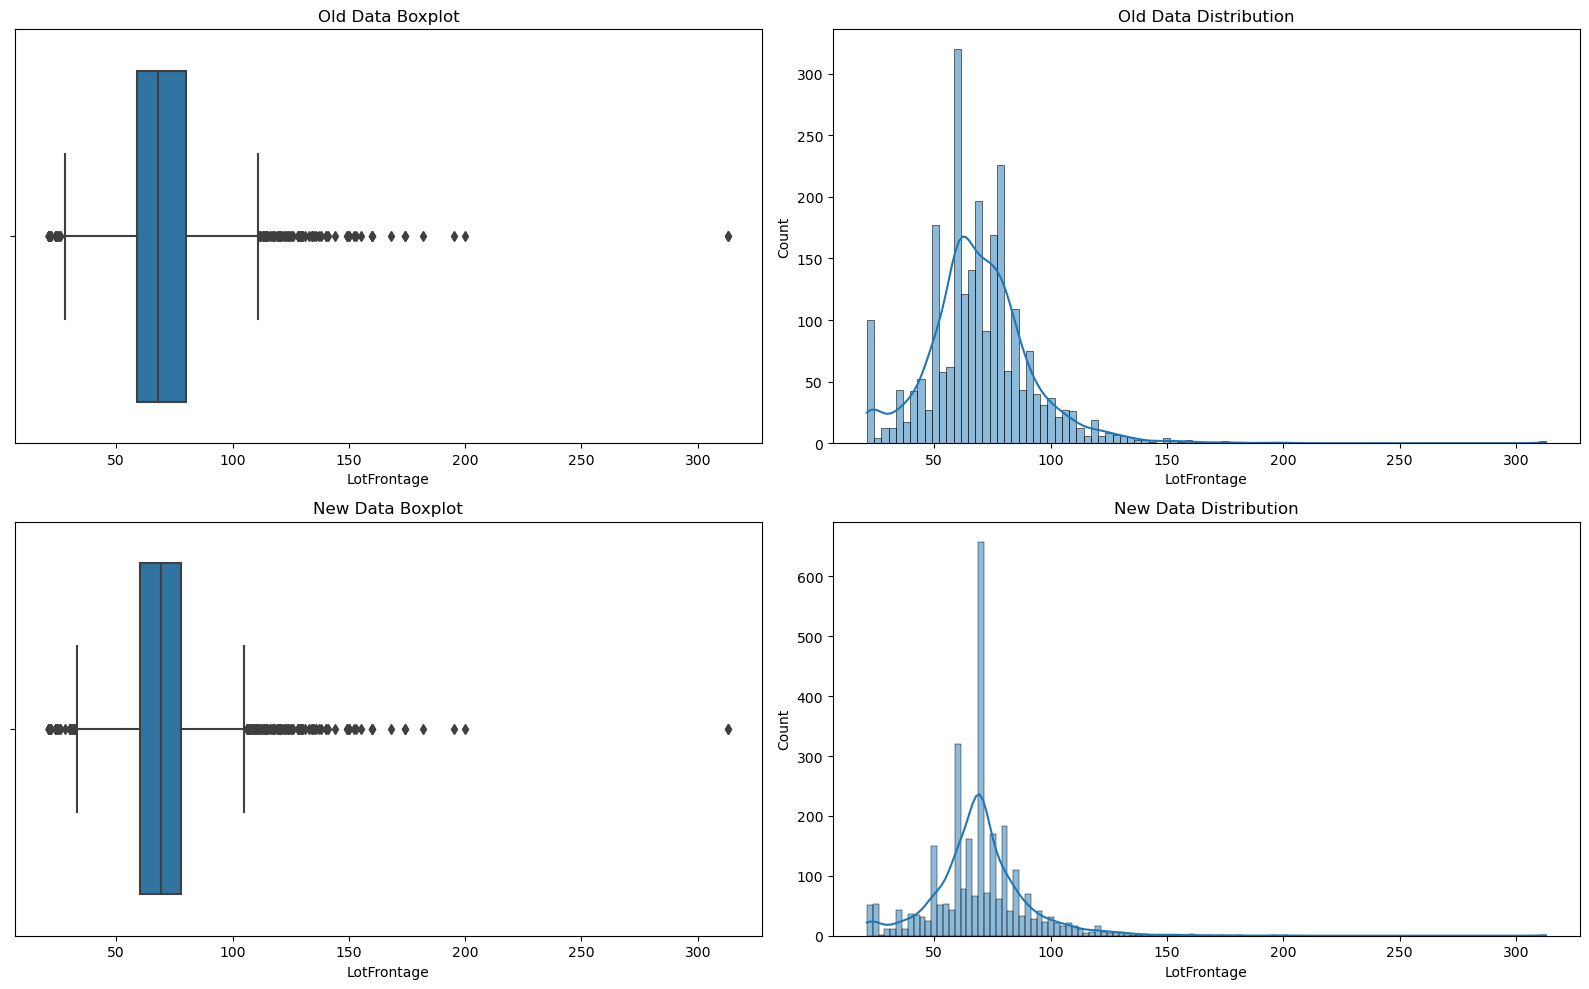

In [40]:
def oldNewBoxMistPlot(df, df_new, feature, figsize=(16, 10)):
    plt.figure(figsize=figsize)

   
    plt.subplot(221)
    sns.boxplot(x=df[feature])
    plt.title("Old Data Boxplot")

   
    plt.subplot(222)
    sns.histplot(df[feature], kde=True)  
    plt.title("Old Data Distribution")

   
    plt.subplot(223)
    sns.boxplot(x=df_new[feature])
    plt.title("New Data Boxplot")

  
    plt.subplot(224)
    sns.histplot(df_new[feature], kde=True)  
    plt.title("New Data Distribution")

    plt.tight_layout()
    plt.show()

oldNewBoxMistPlot(df, df_mvi, "LotFrontage")


## Handling Utilies 0.068517

In [41]:
df["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [42]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace = True)
df_mvi["Utilities"].isnull().sum()

0

## Handling Exterior1st = 0.034258 Exterior2nd = 0.34258

In [43]:
df["Exterior1st"].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [44]:
df["Exterior2nd"].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [45]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace = True)
df_mvi["Exterior2nd"].replace(np.nan, exterior2nd_mode, inplace = True)
print("E1st is null:", df_mvi["Exterior1st"].isnull().sum())
print("E2nd is null:", df_mvi["Exterior2nd"].isnull().sum())

E1st is null: 0
E2nd is null: 0


## Handling MasVnrType = 0.822199 MasVarArea = 0.787941

<Axes: ylabel='Id'>

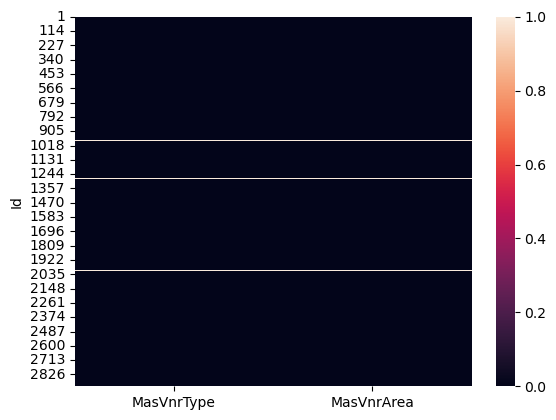

In [46]:
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())

In [47]:
df[df[["MasVnrType", "MasVnrArea"]].isnull().any(axis=1)]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
235           60       RL          NaN     7851   Pave   NaN      Reg   
530           20       RL          NaN    32668   Pave   NaN      IR1   
651           60       FV         65.0     8125   Pave   NaN      Reg   
937           20       RL         67.0    10083   Pave   NaN      Reg   
974           20       FV         95.0    11639   Pave   NaN      Reg   
978          120       FV         35.0     4274   Pave  Pave      IR1   
1244          20       RL        107.0    13891   Pave   NaN      Reg   
1279          60       RL         75.0     9473   Pave   NaN      Reg   
1692          60       RL          NaN    12891   Pave   NaN      IR1   
1707          20       FV         90.0     7993   Pave   NaN      IR1   
1883          60       RL         70.0     8749   Pave   NaN      Reg   
1993          60       RL          NaN     7750   Pave   NaN      Reg   
2005          20       RL         87.0    10037   Pave   NaN      Reg   
2042          60       FV          NaN     7500   Pave   NaN      Reg   
2312          60       RL         59.0    15810   Pave   NaN      IR1   
2326          80       RL          NaN    11950   Pave   NaN      IR1   
2341          20       RL         85.0     9965   Pave   NaN      Reg   
2350          60       FV        112.0    12217   Pave   NaN      IR1   
2369         120       FV         30.0     5330   Pave  Pave      IR2   
2593          20       RL         68.0     8298   Pave   NaN      IR1   
2611          20       RL        124.0    27697   Pave   NaN      Reg   
2658          60       RL        103.0    12867   Pave   NaN      IR1   
2687          20       RL         49.0    15218   Pave   NaN      IR1   
2863          20       RL         75.0     8050   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
235          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
530          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
651          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
937          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
974          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
978          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1244         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1279         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1692         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
1707         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1883         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1993         Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
2005         Lvl    AllPub    Corner       Gtl      Somerst      Feedr   
2042         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
2312         Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
2326         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
2341         Lvl    AllPub       FR2       Gtl      Somerst      Feedr   
2350         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
2369         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
2593         HLS    AllPub    Inside       Gtl       Timber       Norm   
2611         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2658         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
2687         Lvl    AllPub   CulDSac       Gtl      Somerst       RRAn   
2863         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
235        Norm     1Fam     2

In [48]:
df["MasVnrType"].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [49]:
masvnrtype_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan, masvnrtype_mode, inplace = True)
df_mvi["MasVnrType"].isnull().sum()

0

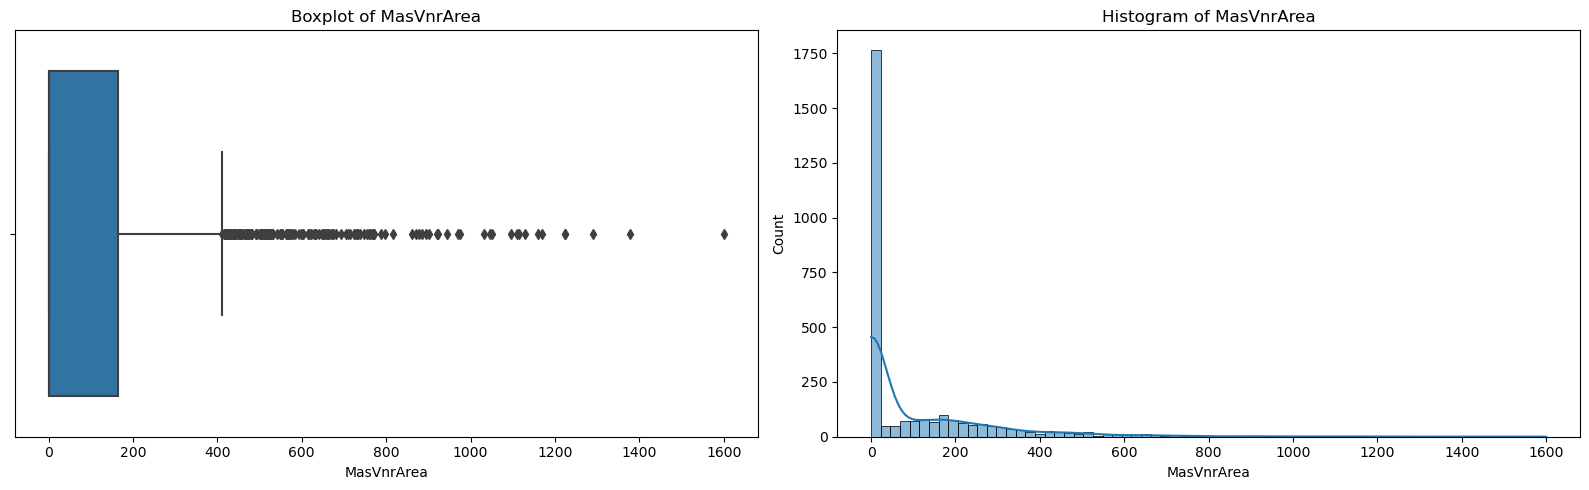

In [50]:
boxMistPlot(df["MasVnrArea"])

In [51]:
cat_bsmt_feat = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
num_bsmt_feat = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]

<Axes: ylabel='Id'>

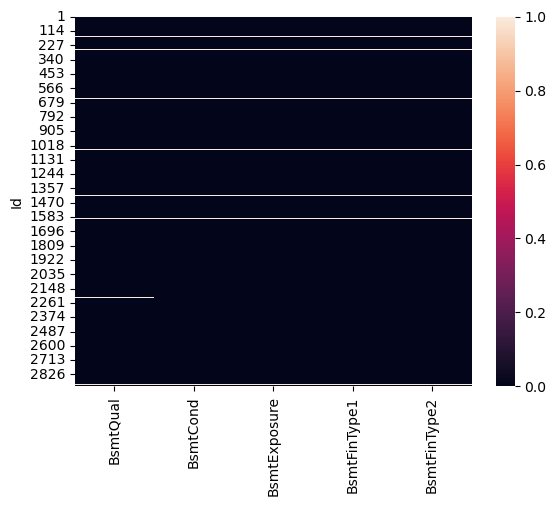

In [52]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [53]:
for feat in cat_bsmt_feat:
    print(f"Value count of (feat): {df[feat].value_counts()}")

Value count of (feat): TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Value count of (feat): TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Value count of (feat): No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Value count of (feat): Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Value count of (feat): Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [54]:
bsmt_const = "NA"
for feat in cat_bsmt_feat:
    print(f"Value count of (feat): {df[feat].value_counts()}")
    df_mvi[feat].replace(np.nan, bsmt_const, inplace=True)

Value count of (feat): TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Value count of (feat): TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Value count of (feat): No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Value count of (feat): Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Value count of (feat): Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [55]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

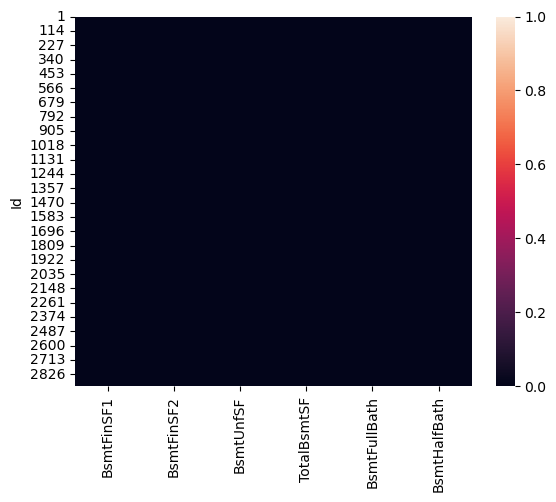

In [56]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [57]:
df_bsmt = df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
Id                                                                          
18        NaN      NaN          NaN          NaN          NaN         0.0   
40        NaN      NaN          NaN          NaN          NaN         0.0   
91        NaN      NaN          NaN          NaN          NaN         0.0   
103       NaN      NaN          NaN          NaN          NaN         0.0   
157       NaN      NaN          NaN          NaN          NaN         0.0   
183       NaN      NaN          NaN          NaN          NaN         0.0   
260       NaN      NaN          NaN          NaN          NaN         0.0   
333        Gd       TA           No          GLQ          NaN      1124.0   
343       NaN      NaN          NaN          NaN          NaN         0.0   
363       NaN      NaN          NaN          NaN          NaN         0.0   
372       NaN      NaN          NaN          NaN          NaN         0.0   
393       NaN      NaN          NaN          NaN          NaN         0.0   
521       NaN      NaN          NaN          NaN          NaN         0.0   
533       NaN      NaN          NaN          NaN          NaN         0.0   
534       NaN      NaN          NaN          NaN          NaN         0.0   
554       NaN      NaN          NaN          NaN          NaN         0.0   
647       NaN      NaN          NaN          NaN          NaN         0.0   
706       NaN      NaN          NaN          NaN          NaN         0.0   
737       NaN      NaN          NaN          NaN          NaN         0.0   
750       NaN      NaN          NaN          NaN          NaN         0.0   
779       NaN      NaN          NaN          NaN          NaN         0.0   
869       NaN      NaN          NaN          NaN          NaN         0.0   
895       NaN      NaN          NaN          NaN          NaN         0.0   
898       NaN      NaN          NaN          NaN          NaN         0.0   
949        Gd       TA          NaN          Unf          Unf         0.0   
985       NaN      NaN          NaN          NaN          NaN         0.0   
1001      NaN      NaN          NaN          NaN          NaN         0.0   
1012      NaN      NaN          NaN          NaN          NaN         0.0   
1036      NaN      NaN          NaN          NaN          NaN         0.0   
1046      NaN      NaN          NaN          NaN          NaN         0.0   
1049      NaN      NaN          NaN          NaN          NaN         0.0   
1050      NaN      NaN          NaN          NaN          NaN         0.0   
1091      NaN      NaN          NaN          NaN          NaN         0.0   
1180      NaN      NaN          NaN          NaN          NaN         0.0   
1217      NaN      NaN          NaN          NaN          NaN         0.0   
1219      NaN      NaN          NaN          NaN          NaN         0.0   
1233      NaN      NaN          NaN          NaN          NaN         0.0   
1322      NaN      NaN          NaN          NaN          NaN         0.0   
1413      NaN      NaN          NaN          NaN          NaN         0.0   
1488       Gd       TA          NaN          Unf          Unf         0.0   
1586      NaN      NaN          NaN          NaN          NaN         0.0   
1594      NaN      NaN          NaN          NaN          NaN         0.0   
1730      NaN      NaN          NaN          NaN          NaN         0.0   
1779      NaN      NaN          NaN          NaN          NaN         0.0   
1815      NaN      NaN          NaN          NaN          NaN         0.0   
1848      NaN      NaN          NaN          NaN          NaN         0.0   
1849      NaN      NaN          NaN          NaN          NaN         0.0   
1857      NaN      NaN          NaN          NaN          NaN         0.0   
1858      NaN      NaN          NaN          NaN          NaN         0.0   
1859      NaN      NaN          NaN          NaN          NaN         0.0   
1

In [58]:
bsmt_num = 0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)

In [59]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

## Handling Electrical = 0.034258 KitchenQual = 0.034258

In [60]:
df["Electrical"].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [61]:
df["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [62]:
df_ekk = df[["Electrical","KitchenQual","KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

Electrical KitchenQual  KitchenAbvGr
Id                                       
1380        NaN          Gd             1
1556      SBrkr         NaN             1

In [63]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, electrical_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

0

In [64]:
KitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan, KitchenQual_mode, inplace=True)
df_mvi["KitchenQual"].isnull().sum()

0

## Handling remaining categorical features

In [65]:
df["Functional"].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [66]:
df["SaleType"].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [67]:
Functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan, Functional_mode, inplace=True)
df_mvi["Functional"].isnull().sum()

0

In [68]:
Saletype_mode = df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan, Saletype_mode, inplace=True)
df_mvi["SaleType"].isnull().sum()

0

In [69]:
other_cat_feat = ["FireplaceQu", "PoolQC","Fence", "MiscFeature"]
for feat in other_cat_feat:
    print(f"Value count of (feat): {df[feat].value_counts()}")

Value count of (feat): Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
Value count of (feat): Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
Value count of (feat): MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
Value count of (feat): Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64


In [70]:
fireplacequ_cont = "NA"
df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont, inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

0

In [71]:
poolqc_cont = "NA"
df_mvi["PoolQC"].replace(np.nan, poolqc_cont, inplace=True)
df_mvi["PoolQC"].isnull().sum()

0

In [72]:
fence_cont = "NA"
df_mvi["Fence"].replace(np.nan, fence_cont, inplace=True)
df_mvi["Fence"].isnull().sum()

0

In [73]:
miscfeature_cont = "NA"
df_mvi["MiscFeature"].replace(np.nan, miscfeature_cont , inplace=True)
df_mvi["MiscFeature"].isnull().sum()

0

## Handling Garage Features

In [74]:
num_garage_feat = ["GarageArea","GarageFinish", "GarageQual", "GarageCond"]
cat_garage_feat = ["GarageYrBlt","GarageCars", "GarageArea"]

df_garafe =df[num_garage_feat + cat_garage_feat]
df_garafe[df_garafe.isnull().any(axis=1)]

GarageArea GarageFinish GarageQual GarageCond  GarageYrBlt  GarageCars  \
Id                                                                             
40           0.0          NaN        NaN        NaN          NaN         0.0   
49           0.0          NaN        NaN        NaN          NaN         0.0   
79           0.0          NaN        NaN        NaN          NaN         0.0   
89           0.0          NaN        NaN        NaN          NaN         0.0   
90           0.0          NaN        NaN        NaN          NaN         0.0   
100          0.0          NaN        NaN        NaN          NaN         0.0   
109          0.0          NaN        NaN        NaN          NaN         0.0   
126          0.0          NaN        NaN        NaN          NaN         0.0   
128          0.0          NaN        NaN        NaN          NaN         0.0   
141          0.0          NaN        NaN        NaN          NaN         0.0   
149          0.0          NaN        NaN        NaN          NaN         0.0   
156          0.0          NaN        NaN        NaN          NaN         0.0   
164          0.0          NaN        NaN        NaN          NaN         0.0   
166          0.0          NaN        NaN        NaN          NaN         0.0   
199          0.0          NaN        NaN        NaN          NaN         0.0   
211          0.0          NaN        NaN        NaN          NaN         0.0   
242          0.0          NaN        NaN        NaN          NaN         0.0   
251          0.0          NaN        NaN        NaN          NaN         0.0   
288          0.0          NaN        NaN        NaN          NaN         0.0   
292          0.0          NaN        NaN        NaN          NaN         0.0   
308          0.0          NaN        NaN        NaN          NaN         0.0   
376          0.0          NaN        NaN        NaN          NaN         0.0   
387          0.0          NaN        NaN        NaN          NaN         0.0   
394          0.0          NaN        NaN        NaN          NaN         0.0   
432          0.0          NaN        NaN        NaN          NaN         0.0   
435          0.0          NaN        NaN        NaN          NaN         0.0   
442          0.0          NaN        NaN        NaN          NaN         0.0   
465          0.0          NaN        NaN        NaN          NaN         0.0   
496          0.0          NaN        NaN        NaN          NaN         0.0   
521          0.0          NaN        NaN        NaN          NaN         0.0   
529          0.0          NaN        NaN        NaN          NaN         0.0   
534          0.0          NaN        NaN        NaN          NaN         0.0   
536          0.0          NaN        NaN        NaN          NaN         0.0   
563          0.0          NaN        NaN        NaN          NaN         0.0   
583          0.0          NaN        NaN        NaN          NaN         0.0   
614          0.0          NaN        NaN        NaN          NaN         0.0   
615          0.0          NaN        NaN        NaN          NaN         0.0   
621          0.0          NaN        NaN        NaN          NaN         0.0   
636          0.0          NaN        NaN        NaN          NaN         0.0   
637          0.0          NaN        NaN        NaN          NaN         0.0   
639          0.0          NaN        NaN        NaN          NaN         0.0   
650          0.0          NaN        NaN        NaN          NaN         0.0   
706          0.0          NaN        NaN        NaN          NaN         0.0   
711          0.0          NaN        NaN        NaN          NaN         0.0   
739          0.0          NaN        NaN        NaN          NaN         0.0   
751          0.0          NaN        NaN        NaN          NaN         0.0   
785          0.0          NaN        NaN        NaN          NaN         0.0   
827          0.0          NaN        NaN        NaN          NaN         0.0   
844   

In [75]:
garage_cont = "NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan, garage_cont, inplace=True)
    
df_mvi[cat_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [76]:
garage_num = 0
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan, garage_num, inplace=True)
    
df_mvi[cat_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [77]:
df_mvi.isnull().any(axis=1).sum()

2838

# Feature Transformation

## Convert Numerical Feature to Categorical Feature

In [78]:
for_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = object
MoSold: data type = int64
YrSold: data type = int64


In [79]:
df_mvi[for_num_conv].head()

MSSubClass  YearBuilt  YearRemodAdd GarageYrBlt  MoSold  YrSold
Id                                                                 
1           60       2003          2003      2003.0       2    2008
2           20       1976          1976      1976.0       5    2007
3           60       2001          2002      2001.0       9    2008
4           70       1915          1970      1998.0       2    2006
5           60       2000          2000      2000.0      12    2008

In [80]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [81]:
for feat in for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [82]:
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


# Conver Categorical Features in Numerical Feature

## Original Encoding

In [83]:
ordinal_end_var =[
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinSF1"
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Functional",
    "GarageFinish",
    "PavedDrive",
    "Utilities"
]

print("Total number of features to convert ordinal numerical format:", len(ordinal_end_var))

Total number of features to convert ordinal numerical format: 17


In [84]:
df_mvi["ExterQual"].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [85]:
df_mvi["BsmtExposure"].value_counts()

No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: BsmtExposure, dtype: int64

In [86]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# One Hot Encoding for Nominal Categorical Data

In [87]:
df_encod = df_mvi.copy()

object_features = df_encod.select_dtypes(include="object").columns.tolist()
print("Total object data type features:", len(object_features))

print("Features:\n", object_features)

Total object data type features: 51
Features:
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [88]:
df_encod[object_features].head(2)

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
Id                                                                             
1          60       RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
2          20       RL   Pave   NaN      Reg         Lvl    AllPub       FR2   

   LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle YearBuilt  \
Id                                                                              
1        Gtl      CollgCr       Norm       Norm     1Fam     2Story      2003   
2        Gtl      Veenker      Feedr       Norm     1Fam     1Story      1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                      
1          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2          1976     Gable  CompShg     MetalSd     MetalSd       None   

   ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
Id                                                                              
1         Gd        TA      PConc       Gd       TA           No          GLQ   
2         TA        TA     CBlock       Gd       TA           Gd          ALQ   

   BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
Id                                                                    
1           Unf    GasA        Ex          Y      SBrkr          Gd   
2           Unf    GasA        Ex          Y      SBrkr          TA   

   Functional FireplaceQu GarageType GarageYrBlt GarageFinish GarageCars  \
Id                                                                         
1         Typ          NA     Attchd      2003.0          RFn        2.0   
2         Typ          TA     Attchd      1976.0          RFn        2.0   

   GarageArea GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
Id                                                                        
1       548.0         TA         TA          Y     NA    NA          NA   
2       460.0         TA         TA          Y     NA    NA          NA   

   MoSold YrSold SaleType SaleCondition  
Id                                       
1       2   2008       WD        Normal  
2       5   2007       WD        Normal

In [89]:
df_encod.columns[df_encod.columns.str.contains("MSZoning")]

Index(['MSZoning'], dtype='object')

In [90]:
df_encod.filter(like="MSZoning").sum()

MSZoning    RLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRMRLRLRLRLRLRMRL...
dtype: object

In [91]:
print("Columns in df_encod:\n", df_encod.columns.tolist())


Columns in df_encod:
 ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Poo

In [92]:
print("Original object features:\n", object_features)


Original object features:
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [93]:
print("Shape of DF before encoding:", df_encod.shape)

print("Shape of DF after encoding:", df_encod.shape)

Shape of DF before encoding: (2919, 80)
Shape of DF after encoding: (2919, 80)


In [94]:
df_encod.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                   
1          60       RL         65.0     8450   Pave   NaN      Reg   
2          20       RL         80.0     9600   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond YearBuilt  \
Id                                                                      
1        Norm     1Fam     2Story            7            5      2003   
2        Norm     1Fam     1Story            6            8      1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                      
1          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2          1976     Gable  CompShg     MetalSd     MetalSd       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0         2         0             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
Id                                                                              
1              1          Gd             8        Typ           0          NA   
2              1          TA             6        Typ           1          TA   

   GarageType GarageYrBlt GarageFinish GarageCars GarageArea GarageQual  \
Id                                                                        
1      Attchd      2003.0          RFn        2.0      548.0         TA   
2      Attchd      1976.0          RFn        2.0      460.0         TA   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                            
1          TA          Y           0           61              0          0   
2          TA          Y         298            0              0          0   

    ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal MoSold YrSold  \
Id                                                                          
1             0         0     NA    NA          NA        0      2   2008   
2             0         0     NA    NA          NA        0      5   2007   

   SaleType SaleCondition  SalePrice  
Id                                    
1        WD        Normal   208500.0  
2        WD        Normal   181500.0

In [95]:
df_encod.select_dtypes(include="object").columns.tolist()

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

# Split the data for Training and Testing

In [96]:
df_encod.shape

(2919, 80)

In [97]:
len_train = df_train.shape[0]

In [98]:
X_train = df_encod[:len_train].drop("SalePrice", axis=1)
y_train = df_encod["SalePrice"][:len_train]
X_test = df_encod[len_train:].drop("SalePrice", axis=1)

print("Shape of X_train data:", X_train.shape)
print("Shape of y_train data:", X_train.shape)
print("Shape of X_test data:", X_test.shape)

Shape of X_train data: (1460, 79)
Shape of y_train data: (1460, 79)
Shape of X_test data: (1459, 79)


# Feature Scaling

In [99]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
   
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train = pd.DataFrame(X_train_transformed, columns=numerical_cols.tolist() + categorical_cols.tolist())
X_test = pd.DataFrame(X_test_transformed, columns=numerical_cols.tolist() + categorical_cols.tolist())


In [100]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=your_column_names)

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
    
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


X_train = pd.DataFrame(X_train_transformed, columns=numerical_cols.tolist() + categorical_cols.tolist())
X_test = pd.DataFrame(X_test_transformed, columns=numerical_cols.tolist() + categorical_cols.tolist())


In [101]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separate numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [102]:
import pandas as pd

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

feature_names = preprocessor.get_feature_names_out()
X_train = pd.DataFrame(X_train_dense, columns=feature_names)
X_test = pd.DataFrame(X_test_dense, columns=feature_names)


In [103]:
X_train.iloc[:3, :]


cat__LotFrontage_-2.2216935258779658  cat__LotFrontage_-2.08544331222772  \
0                                   0.0                                 0.0   
1                                   0.0                                 0.0   
2                                   0.0                                 0.0   

   cat__LotFrontage_-1.8129428849272275  cat__LotFrontage_-1.7221094091603968  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-1.6766926712769814  cat__LotFrontage_-1.631275933393566  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   

   cat__LotFrontage_-1.5858591955101506  cat__LotFrontage_-1.5404424576267353  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-1.4950257197433199  cat__LotFrontage_-1.4496089818599045  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-1.4041922439764891  cat__LotFrontage_-1.3587755060930737  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-1.3133587682096584  cat__LotFrontage_-1.267942030326243  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   

   cat__LotFrontage_-1.2225252924428276  cat__LotFrontage_-1.1771085545594124  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-1.131691816675997  cat__LotFrontage_-1.0862750787925817  \
0                                  0.0                                   0.0   
1                                  0.0                                   0.0   
2                                  0.0                                   0.0   

   cat__LotFrontage_-1.0408583409091663  cat__LotFrontage_-0.9954416030257508  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-0.9500248651423354  cat__LotFrontage_-0.9046081272589201  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-0.8591913893755048  cat__LotFrontage_-0.8137746514920894  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-0.768357913608674  cat__LotFrontage_-0.7229411757252586  \
0                                  0.0     

In [104]:
X_test.iloc[:3, :]

cat__LotFrontage_-2.2216935258779658  cat__LotFrontage_-2.08544331222772  \
0                                   0.0                                 0.0   
1                                   0.0                                 0.0   
2                                   0.0                                 0.0   

   cat__LotFrontage_-1.8129428849272275  cat__LotFrontage_-1.7221094091603968  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-1.6766926712769814  cat__LotFrontage_-1.631275933393566  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   

   cat__LotFrontage_-1.5858591955101506  cat__LotFrontage_-1.5404424576267353  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-1.4950257197433199  cat__LotFrontage_-1.4496089818599045  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-1.4041922439764891  cat__LotFrontage_-1.3587755060930737  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-1.3133587682096584  cat__LotFrontage_-1.267942030326243  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   

   cat__LotFrontage_-1.2225252924428276  cat__LotFrontage_-1.1771085545594124  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-1.131691816675997  cat__LotFrontage_-1.0862750787925817  \
0                                  0.0                                   0.0   
1                                  0.0                                   0.0   
2                                  0.0                                   0.0   

   cat__LotFrontage_-1.0408583409091663  cat__LotFrontage_-0.9954416030257508  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-0.9500248651423354  cat__LotFrontage_-0.9046081272589201  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-0.8591913893755048  cat__LotFrontage_-0.8137746514920894  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   

   cat__LotFrontage_-0.768357913608674  cat__LotFrontage_-0.7229411757252586  \
0                                  0.0     

In [105]:

sc.fit(X_train)


print(sc.mean_.shape)


NameError: name 'sc' is not defined

# Train ML Model

In [106]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


In [107]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
mlpr = MLPRegressor()


In [108]:
models = {
    "a": ["LinearRegression", lr],
    "b": ["SVR", svr],
    "c": ["SGDRegressor", sgdr],
    "d": ["KNeighborsRegressor", knr],
    "e": ["GaussianProcessRegressor", gpr],
    "f": ["DecisionTreeRegressor", dtr],
    "g": ["GradientBoostingRegressor", gbr],
    "h": ["RandomForestRegressor", rfr],
    "i": ["XGBRegressor", xgbr],
    "j": ["MLPRegressor", mlpr],
    
}


In [109]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train, y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = r2_val_score.mean()
    return score

from sklearn.linear_model import SGDRegressor

# Increase max_iter to give the model more time to converge
sgdr = SGDRegressor(max_iter=1000)  # Adjust the value as needed



In [ ]:
models_score = []

for model in models:
    print("Training model:", models[model][0])
    score = test_model(models[model][1], X_train, y_train)
    print("Score of model:", score)
    models_score.append([models[model][0], score])



Training model: LinearRegression
Score of model: 0.8173400621748216
Training model: SVR
Score of model: -0.051923972072625384
Training model: SGDRegressor


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
